# 🔧 Notebook Setup for 3-Class DeBERTa Fine-Tuning

This notebook sets up the environment to run the DeBERTa 3-class sentiment classification model from within a subdirectory (`notebooks/fine_tuning/fine_tuning_3class/`).

To ensure consistent paths (especially for model saving/loading), we manually add the project root to `sys.path`, so imports and relative paths from `src/` and `saved_models/` work as expected.


In [1]:
# cell 1
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display, HTML, clear_output

In [2]:
# cell 2
import sys
from pathlib import Path

# Detect the project root relative to the current notebook directory
project_root = Path.cwd().resolve().parents[2]  # from notebooks/fine_tuning/fine_tuning_3class/
sys.path.append(str(project_root))

print(f"✅ Project root added to sys.path: {project_root}")

from src.config_three_class import CONFIG_3CLASS
from pathlib import Path

# Resolve and display model save path
model_path = Path(CONFIG_3CLASS["models"]["deberta"]["model_save_path"]).resolve()
print(f"📦 Model save path: {model_path}")


✅ Project root added to sys.path: /Users/afshinpaydar/Desktop/temp/Thesis
📦 Model save path: /Users/afshinpaydar/Desktop/temp/Thesis/saved_models/deberta_3class_v02


In [3]:
import torch

if torch.backends.mps.is_available():
    print("✅ MPS (Apple GPU) is available")
else:
    print("❌ MPS not available")


✅ MPS (Apple GPU) is available


Starting fine-tuning process...
[INFO] Initializing DeBERTa 3-class fine-tuner with model: microsoft/deberta-base
[INFO] Tokenizer loaded successfully.


Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[INFO] Model microsoft/deberta-base initialized with 3 labels.


/opt/anaconda3/lib/python3.12/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


[INFO] Model moved to device: mps
[INFO] Data module initialized.
[INFO] Using class weights: [1.4208103  0.67049855 1.2426239 ]
[INFO] Model initialized on device: mps
[INFO] Optimizer: AdamW with learning rate 1e-05
[INFO] ModelTrainer initialized.

[INFO] Starting DeBERTa 3-class fine-tuning process.
[INFO] Loading dataset...
[INFO] Loaded dataset with 16973 samples.
[INFO] Creating dataloaders...
[INFO] Dataloaders created.

[INFO] Starting training...
[INFO] Model running on: mps:0
[INFO] Training started for 5 epochs.


Training Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 398/398 [16:22<00:00,  2.92s/it, loss=0.2425, avg_loss=0.3441]
                                                                                                                                                                                                                    
Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [01:19<00:00,  1.19it/s, loss=0.3831]
Epoch 1/5 - Loss: 0.5286 - Val Loss: 0.3425 - Val Acc: 0.8657 - Val F1: 0.8658:   0%|                                                                                                         | 0/5 [17:42<?, ?it/s]


⏱️  Epoch: 1/5
📊 Training   | Loss: 0.5286
📊 Validation | Loss: 0.3425 | Accuracy: 0.8657 | F1 Score: 0.8658



Epoch 1/5 - Loss: 0.5286 - Val Loss: 0.3425 - Val Acc: 0.8657 - Val F1: 0.8658:  20%|██████████████████▌                                                                          | 1/5 [17:46<1:11:04, 1066.21s/it]

📈 New best model saved!



Training Batches: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 397/398 [16:09<00:02,  2.43s/it, loss=0.2248, avg_loss=0.2610]
                                                                                                                                                                                                                    
Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [01:12<00:00,  1.24it/s, loss=0.2640]
Epoch 2/5 - Loss: 0.2844 - Val Loss: 0.3112 - Val Acc: 0.8877 - Val F1: 0.8875:  20%|██████████████████▌                                                                          | 1/5 [35:08<1:11:04, 1066.21s/it]


⏱️  Epoch: 2/5
📊 Training   | Loss: 0.2844
📊 Validation | Loss: 0.3112 | Accuracy: 0.8877 | F1 Score: 0.8875



Epoch 2/5 - Loss: 0.2844 - Val Loss: 0.3112 - Val Acc: 0.8877 - Val F1: 0.8875:  40%|██████████████████████████████████████                                                         | 2/5 [35:12<52:43, 1054.43s/it]

📈 New best model saved!



Training Batches: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 397/398 [15:51<00:02,  2.38s/it, loss=0.0966, avg_loss=0.2414]
                                                                                                                                                                                                                    
Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [01:08<00:00,  1.28it/s, loss=0.3201]
Epoch 3/5 - Loss: 0.2292 - Val Loss: 0.3162 - Val Acc: 0.8806 - Val F1: 0.8804:  60%|█████████████████████████████████████████████████████████                                      | 3/5 [52:12<34:37, 1038.74s/it]


⏱️  Epoch: 3/5
📊 Training   | Loss: 0.2292
📊 Validation | Loss: 0.3162 | Accuracy: 0.8806 | F1 Score: 0.8804




Training Batches: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 397/398 [15:48<00:02,  2.37s/it, loss=0.1056, avg_loss=0.1494]
                                                                                                                                                                                                                    
Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [01:08<00:00,  1.25it/s, loss=0.2568]
Epoch 4/5 - Loss: 0.1866 - Val Loss: 0.3410 - Val Acc: 0.8955 - Val F1: 0.8954:  60%|███████████████████████████████████████████████████████▊                                     | 3/5 [1:09:09<34:37, 1038.74s/it]


⏱️  Epoch: 4/5
📊 Training   | Loss: 0.1866
📊 Validation | Loss: 0.3410 | Accuracy: 0.8955 | F1 Score: 0.8954



Epoch 4/5 - Loss: 0.1866 - Val Loss: 0.3410 - Val Acc: 0.8955 - Val F1: 0.8954:  80%|██████████████████████████████████████████████████████████████████████████▍                  | 4/5 [1:09:13<17:11, 1031.70s/it]

📈 New best model saved!



Training Batches: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 397/398 [15:47<00:02,  2.43s/it, loss=0.0974, avg_loss=0.0975]
                                                                                                                                                                                                                    
Evaluating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 80/80 [01:10<00:00,  1.26it/s, loss=0.1984]
Epoch 5/5 - Loss: 0.1639 - Val Loss: 0.3448 - Val Acc: 0.8920 - Val F1: 0.8920: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [1:26:11<00:00, 1034.37s/it]



⏱️  Epoch: 5/5
📊 Training   | Loss: 0.1639
📊 Validation | Loss: 0.3448 | Accuracy: 0.8920 | F1 Score: 0.8920

✅ Training complete!


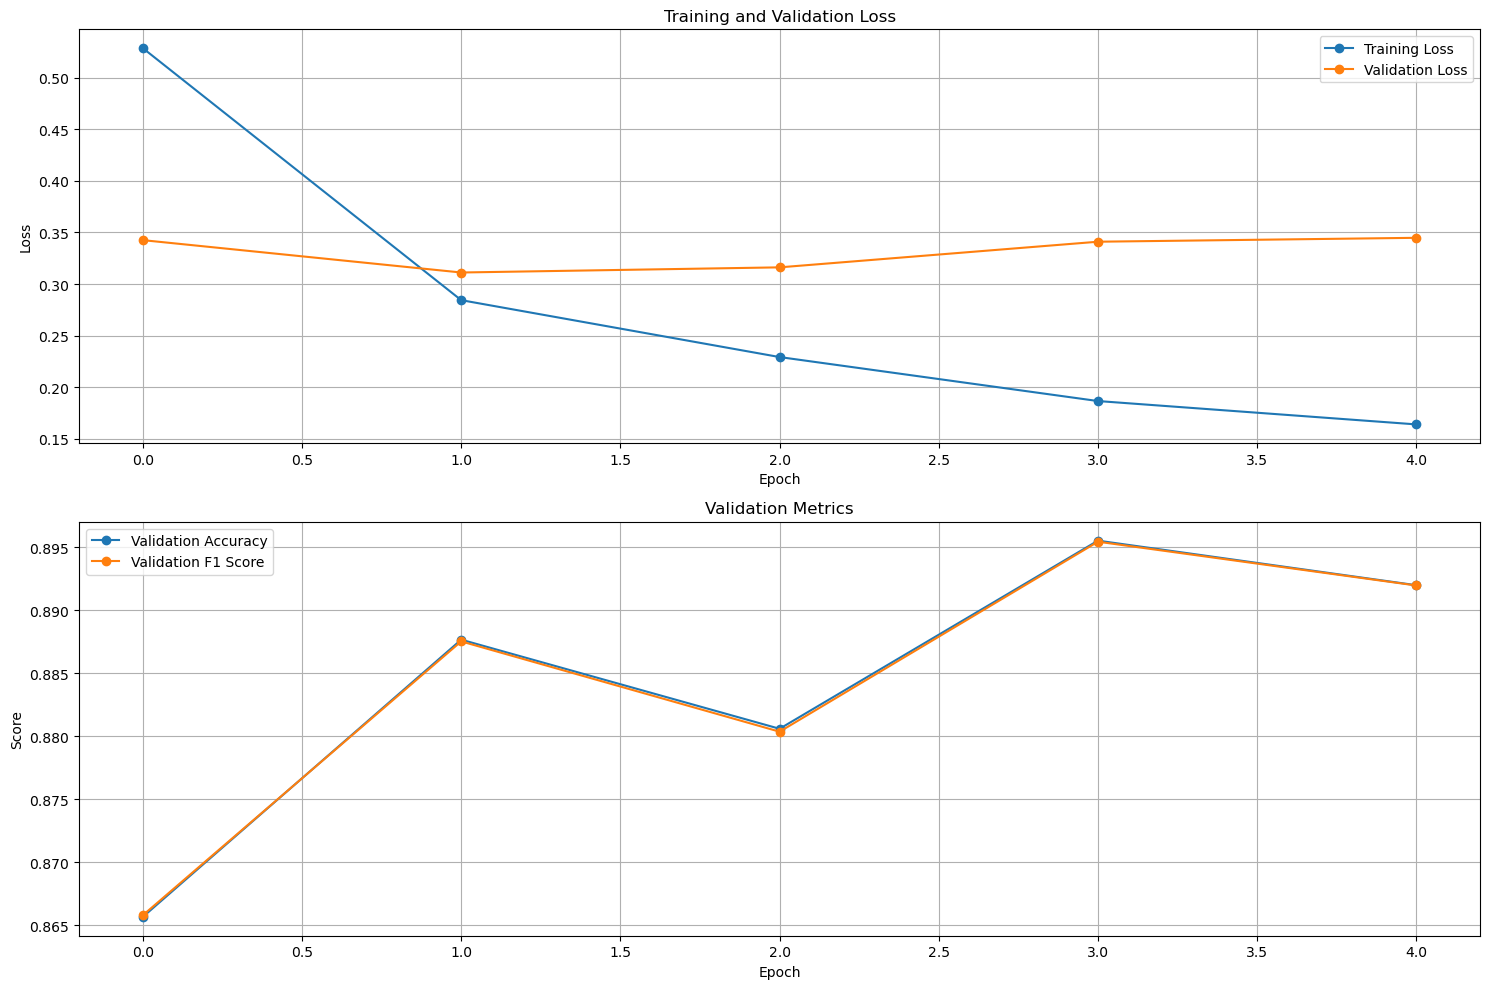

[INFO] Training complete.
[INFO] Evaluating model...
[INFO] Initializing model evaluator...
[INFO] Running evaluation...
[INFO] Evaluating model on 54 batches...
[INFO] Evaluation complete. Processed 1698 samples.
[INFO] Calculating metrics...
[INFO] Metrics calculated. Overall accuracy: 0.8810
[INFO] Generating evaluation report at /Users/afshinpaydar/Desktop/temp/Thesis/saved_models/deberta_3class/evaluation_results/evaluation_result_v02...
[INFO] Evaluation report saved as '/Users/afshinpaydar/Desktop/temp/Thesis/saved_models/deberta_3class/evaluation_results/evaluation_result_v02'
[INFO] Calculating metrics...
[INFO] Metrics calculated. Overall accuracy: 0.8810
[INFO] Evaluation report generated at /Users/afshinpaydar/Desktop/temp/Thesis/saved_models/deberta_3class/evaluation_results/evaluation_result_v02
[INFO] Model evaluation metrics: {'accuracy': 0.8810365135453475, 'precision': 0.8721413776120346, 'recall': 0.8870546612003335, 'f1': 0.8787364461464987, 'per_class': {'Negative'

In [4]:
# cell 3
from src.models.deberta_3class.train_deberta_3class import main

# Run the main function and capture the returned fine_tuner instance
print("Starting fine-tuning process...")
fine_tuner = main()
print("Fine-tuning process completed!")   

Final Evaluation Metrics:


,Metric,Value
0,accuracy,0.881037
1,precision,0.872141
2,recall,0.887055
3,f1,0.878736
4,per_class,"{'Negative': {'precision': 0.8450363196125908,..."
5,confusion_matrix,"[[349, 42, 8], [56, 725, 63], [8, 25, 422]]"


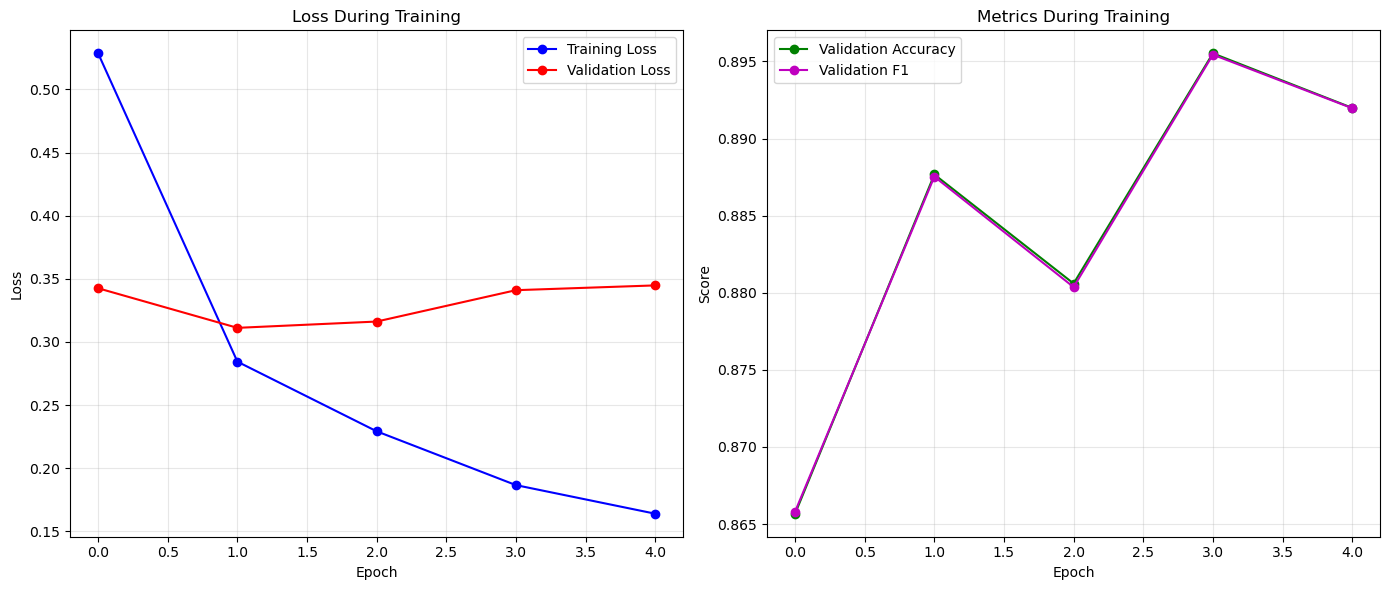

In [5]:
# Cell 4: View Training Results
    
# Display metrics if available
if hasattr(fine_tuner, 'metrics'):
    print("Final Evaluation Metrics:")
    metrics_df = pd.DataFrame([fine_tuner.metrics])
    display(metrics_df.T.reset_index().rename(columns={'index': 'Metric', 0: 'Value'}))
# Visualize training history if available
if hasattr(fine_tuner.trainer, 'history') and fine_tuner.trainer.history:
    history = fine_tuner.trainer.history
    if history.get('train_loss') and history.get('val_loss'):
        # Create figure
        plt.figure(figsize=(14, 6))
        # Plot training and validation loss
        plt.subplot(1, 2, 1)
        plt.plot(history['train_loss'], 'b-o', label='Training Loss')
        plt.plot(history['val_loss'], 'r-o', label='Validation Loss')
        plt.title('Loss During Training')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True, alpha=0.3)
        # Plot performance metrics
        plt.subplot(1, 2, 2)
        if 'val_accuracy' in history:
            plt.plot(history['val_accuracy'], 'g-o', label='Validation Accuracy')
        if 'val_f1' in history:
            # Fix: Change 'p-o' to 'm-o' (magenta instead of purple)
            plt.plot(history['val_f1'], 'm-o', label='Validation F1')
        plt.title('Metrics During Training')
        plt.xlabel('Epoch')
        plt.ylabel('Score')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
else:
    print("No training history available.")

Loading test dataset...
✅ Test dataset loaded with 1698 samples.
Running comprehensive evaluation...
[INFO] Evaluating model on 54 batches...
[INFO] Evaluation complete. Processed 1698 samples.
[INFO] Calculating metrics...
[INFO] Metrics calculated. Overall accuracy: 0.8810
Saving predictions with confidence scores...
📄 Saved test set predictions to: /Users/afshinpaydar/Desktop/temp/Thesis/saved_models/evaluation_results/test_predictions_with_confidence_v02_27032025.csv


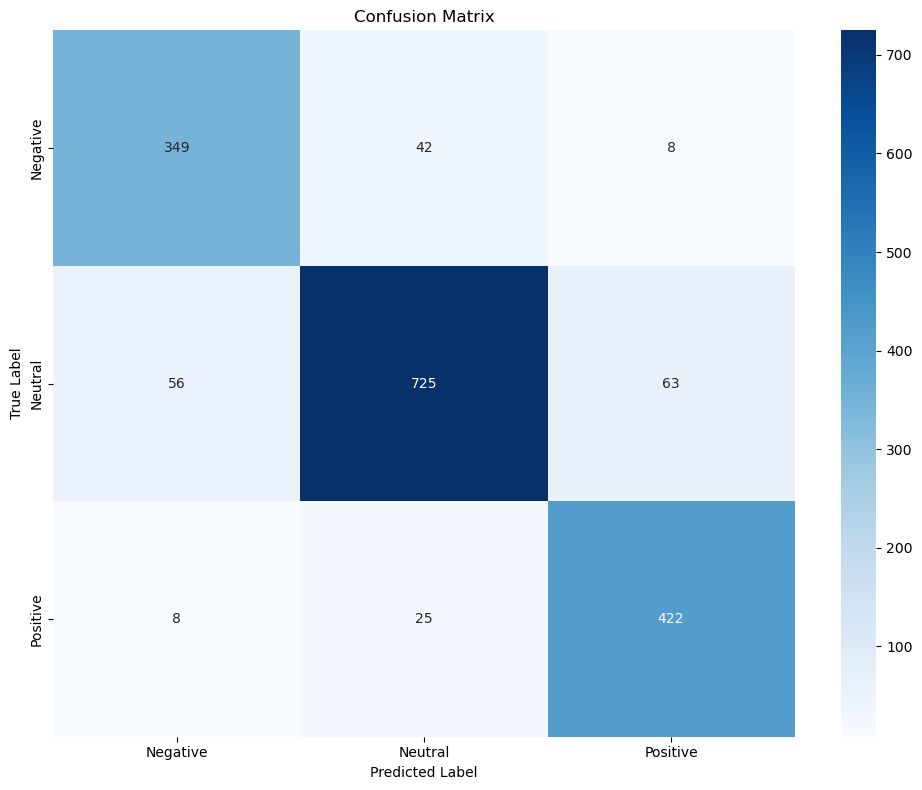


Classification Report:


,Precision,Recall,F1 Score,Accuracy
0,0.872141,0.887055,0.878736,0.881037



Per-Class Performance:


,precision,recall,f1-score,support
Negative,0.845036,0.874687,0.859606,399.0
Neutral,0.915404,0.859005,0.886308,844.0
Positive,0.855984,0.927473,0.890295,455.0


In [6]:
# Cell 5: Run Comprehensive Evaluation + Save Predictions with Confidence
try:
    from IPython.display import display, HTML
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd
    from pathlib import Path
    from src.training.model_evaluator import ModelEvaluator
    from src.config_three_class import CONFIG_3CLASS as CONFIG
    
    display(HTML("<div class='section-header'>Model Evaluation</div>"))
    
    # Get test data
    print("Loading test dataset...")
    texts, labels = fine_tuner.data_module.load_dataset()
    _, _, test_loader = fine_tuner.data_module.create_dataloaders(texts, labels)
    print(f"✅ Test dataset loaded with {len(test_loader.dataset)} samples.")
    
    # Run evaluation
    print("Running comprehensive evaluation...")
    evaluator = ModelEvaluator(
        model=fine_tuner.model,
        device=fine_tuner.device,
        model_name="DeBERTa 3-Class Sentiment Classifier",
        class_names=fine_tuner.class_names
    )
    
    all_labels, all_preds, all_probs = evaluator.evaluate(test_loader)
    metrics = evaluator.calculate_metrics(all_labels, all_preds, all_probs)
    
    # Save full prediction results with confidence
    print("Saving predictions with confidence scores...")
    output_df = pd.DataFrame({
        "message": texts[-len(all_labels):],  # match the test set
        "true_label": [fine_tuner.class_names[label] for label in all_labels],
        "predicted_label": [fine_tuner.class_names[pred] for pred in all_preds],
        "true_index": all_labels,
        "predicted_index": all_preds,
        "confidence": [max(prob) for prob in all_probs]
    })

    output_path = Path("/Users/afshinpaydar/Desktop/temp/Thesis/saved_models/evaluation_results/test_predictions_with_confidence_v02_27032025.csv")
    output_path.parent.mkdir(parents=True, exist_ok=True)
    output_df.to_csv(output_path, index=False)
    print(f"📄 Saved test set predictions to: {output_path}")
    
    # Confusion matrix
    plt.figure(figsize=(10, 8))
    cm = metrics["confusion_matrix"]
    sns.heatmap(
        cm, annot=True, fmt="d", cmap="Blues",
        xticklabels=fine_tuner.class_names,
        yticklabels=fine_tuner.class_names
    )
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.show()
    
    # Summary classification metrics
    print("\nClassification Report:")
    metrics_df = pd.DataFrame({
        'Precision': [metrics['precision']],
        'Recall': [metrics['recall']],
        'F1 Score': [metrics['f1']],
        'Accuracy': [metrics['accuracy']]
    })
    display(metrics_df)
    
    # Per-class metrics
    if 'per_class' in metrics:
        print("\nPer-Class Performance:")
        per_class_df = pd.DataFrame(metrics['per_class']).T
        display(per_class_df)

except Exception as e:
    print(f"An error occurred: {e}")
    import traceback
    traceback.print_exc()


In [7]:
# Cell 6: Error Analysis – Save Misclassified Predictions
import pandas as pd
from pathlib import Path
from src.config_three_class import CONFIG_3CLASS as CONFIG  # ✅ correct config

try:
    # Load and clean the raw dataset
    df_raw = pd.read_csv(CONFIG["dataset"]["dataset_path"])
    df_raw = df_raw.dropna(subset=["message"]).drop_duplicates(subset=["message"]).reset_index(drop=True)

    # Map labels: -1 → 0, 0 → 1, 1 → 2
    label_map = {-1: 0, 0: 1, 1: 2}
    df_raw["mapped_label"] = df_raw["sentiment"].map(label_map)

    # Load data split (only test set)
    texts, labels = fine_tuner.data_module.load_dataset()
    _, _, test_loader = fine_tuner.data_module.create_dataloaders(texts, labels)

    # Extract test texts from test_loader (guaranteed correct order)
    test_texts = [batch["input_ids"] for batch in test_loader]
    test_indices = test_loader.dataset.indices if hasattr(test_loader.dataset, 'indices') else list(test_loader.dataset)

    # Slice original cleaned texts to test set size
    test_texts = [texts[i] for i in range(len(test_loader.dataset))]

    # Evaluate if needed
    if 'all_preds' not in globals() or 'all_labels' not in globals():
        all_labels, all_preds, all_probs = evaluator.evaluate(test_loader)

    # Build DataFrame
    error_df = pd.DataFrame({
        "message": test_texts,
        "true_label": [fine_tuner.class_names[label] for label in all_labels],
        "predicted_label": [fine_tuner.class_names[pred] for pred in all_preds],
        "true_index": all_labels,
        "predicted_index": all_preds
    })

    # Find misclassified rows
    misclassified = error_df[error_df["true_index"] != error_df["predicted_index"]]

    # Save
    output_path = Path("saved_models/evaluation_results_deberta_3class/misclassified_predictions.csv")
    output_path.parent.mkdir(parents=True, exist_ok=True)
    misclassified.to_csv(output_path, index=False)

    print(f"❌ Saved {len(misclassified)} misclassified examples to: {output_path}")

except Exception as e:
    print("⚠️ Error during misclassification analysis:")
    import traceback
    traceback.print_exc()


❌ Saved 202 misclassified examples to: saved_models/evaluation_results_deberta_3class/misclassified_predictions.csv


In [8]:
# cell 7
import os
from IPython.display import HTML, display
from src.config_three_class import CONFIG_3CLASS as CONFIG  # ✅ correct config

# Cell 6: Generate PDF Report
try:
    display(HTML("<div class='section-header'>Generate Evaluation Report</div>"))
    
    # Use path from config
    report_path = CONFIG["evaluation"]["report_save_path"]
    os.makedirs(os.path.dirname(report_path), exist_ok=True)
    
    print(f"Generating comprehensive PDF report at {report_path}...")
    evaluator.generate_pdf_report(all_labels, all_preds, all_probs, output_path=report_path)
    print(f"✅ PDF report generated successfully at: {report_path}")
    
except Exception as e:
    print(f"❌ An error occurred: {e}")
    import traceback
    traceback.print_exc()


Generating comprehensive PDF report at /Users/afshinpaydar/Desktop/temp/Thesis/saved_models/deberta_3class/evaluation_results/evaluation_result_v02...
[INFO] Calculating metrics...
[INFO] Metrics calculated. Overall accuracy: 0.8810
[INFO] Generating evaluation report at /Users/afshinpaydar/Desktop/temp/Thesis/saved_models/deberta_3class/evaluation_results/evaluation_result_v02...
[INFO] Evaluation report saved as '/Users/afshinpaydar/Desktop/temp/Thesis/saved_models/deberta_3class/evaluation_results/evaluation_result_v02'
✅ PDF report generated successfully at: /Users/afshinpaydar/Desktop/temp/Thesis/saved_models/deberta_3class/evaluation_results/evaluation_result_v02


In [9]:
# cell 8
import torch
from IPython.display import display, HTML, clear_output
from ipywidgets import widgets, Layout
from src.config_three_class import CONFIG_3CLASS as CONFIG  # ✅ Use 3-class config

# Cell 7: Test with Custom Inputs (Optional)
try:
    # Display header
    display(HTML("<div class='section-header'>Test with Custom Inputs</div>"))
    
    def predict_sentiment(text):
        """Function to predict sentiment of a given text"""
        inputs = fine_tuner.tokenizer(
            text,
            return_tensors="pt",
            truncation=True,
            padding="max_length",
            max_length=CONFIG["training"]["max_length"]
        )
        inputs = {key: val.to(fine_tuner.device) for key, val in inputs.items()}
        fine_tuner.model.eval()

        with torch.no_grad():
            outputs = fine_tuner.model(**inputs)
            logits = outputs.logits
            probabilities = torch.nn.functional.softmax(logits, dim=1)
            prediction = torch.argmax(logits, dim=1)

        predicted_class = fine_tuner.class_names[prediction.item()]
        confidence = probabilities[0][prediction.item()].item() * 100

        class_probs = {
            fine_tuner.class_names[i]: prob.item() * 100 
            for i, prob in enumerate(probabilities[0])
        }
        
        return predicted_class, confidence, class_probs
    
    # UI
    text_input = widgets.Textarea(
        placeholder='Enter text to analyze...',
        layout=Layout(width='100%', height='100px')
    )
    
    button = widgets.Button(
        description='Analyze Sentiment',
        button_style='primary',
        layout=Layout(width='200px')
    )
    
    output = widgets.Output()
    
    def on_button_click(b):
        with output:
            clear_output()
            if not text_input.value.strip():
                print("Please enter some text to analyze.")
                return
            
            print(f"Analyzing: \"{text_input.value}\"")
            predicted_class, confidence, class_probs = predict_sentiment(text_input.value)
            
            print(f"\nPredicted sentiment: {predicted_class} (Confidence: {confidence:.2f}%)")
            print("\nProbabilities for all classes:")
            for cls, prob in class_probs.items():
                print(f"  - {cls}: {prob:.2f}%")
    
    button.on_click(on_button_click)
    
    print("Try your own examples:")
    display(text_input)
    display(button)
    display(output)
    
except Exception as e:
    print(f"An error occurred: {e}")
    import traceback
    traceback.print_exc()


Try your own examples:


Textarea(value='', layout=Layout(height='100px', width='100%'), placeholder='Enter text to analyze...')

Button(button_style='primary', description='Analyze Sentiment', layout=Layout(width='200px'), style=ButtonStyl…

Output()

In [ ]:
# # Cell X: Automatically Save Best Model After Training
# from src.config_three_class import CONFIG_3CLASS as CONFIG
# from pathlib import Path
# import os, torch, json
# from datetime import datetime

# def save_best_model_from_history(fine_tuner, base_dir="saved_models"):
#     """
#     Automatically extract the best epoch from fine_tuner history and save the model, tokenizer, and metadata.
#     """
#     history = fine_tuner.trainer.history
#     if not history or 'val_f1' not in history:
#         print("⚠️ No training history found. Cannot determine best epoch.")
#         return None

#     # 1. Identify best epoch (index + 1 for human-readable epoch)
#     best_epoch = history['val_f1'].index(max(history['val_f1'])) + 1

#     # 2. Extract best metrics
#     best_metrics = {
#         "train_loss": history["train_loss"][best_epoch-1],
#         "val_loss": history["val_loss"][best_epoch-1],
#         "val_accuracy": history["val_accuracy"][best_epoch-1],
#         "val_f1": history["val_f1"][best_epoch-1]
#     }

#     # 3. Create save path
#     model_type = fine_tuner.model_type if hasattr(fine_tuner, "model_type") else "deberta"
#     timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
#     save_dir = os.path.join(base_dir, f"{model_type}_best_3class_model_epoch{best_epoch}")
#     os.makedirs(save_dir, exist_ok=True)

#     # 4. Save model weights
#     weights_path = os.path.join(save_dir, f"best_weights_epoch{best_epoch}.pt")
#     torch.save(fine_tuner.model.state_dict(), weights_path)
#     print(f"✅ Model weights saved at: {weights_path}")

#     # 5. Save tokenizer
#     tokenizer_path = os.path.join(save_dir, "tokenizer")
#     fine_tuner.tokenizer.save_pretrained(tokenizer_path)
#     print(f"✅ Tokenizer saved at: {tokenizer_path}")

#     # 6. Save config + metrics
#     config_data = {
#         "model_name": f"{model_type.capitalize()} Sentiment Classifier",
#         "best_epoch": best_epoch,
#         "metrics": {k: float(v) for k, v in best_metrics.items()},
#         "timestamp": timestamp,
#         "class_names": fine_tuner.class_names,
#         "device_trained_on": str(fine_tuner.device),
#         "pretrained_model": CONFIG["models"][model_type]["pretrained_model_name"],
#         "training_config": CONFIG["training"],
#         "dataset_config": {k: v for k, v in CONFIG["dataset"].items() if "raw" not in k}
#     }

#     with open(os.path.join(save_dir, f"config_{timestamp}.json"), "w") as f:
#         json.dump(config_data, f, indent=4)
#         print(f"✅ Config saved at: {save_dir}/config_{timestamp}.json")

#     # 7. Write short info file
#     info_txt = os.path.join(save_dir, "best_model_info.txt")
#     with open(info_txt, "w") as f:
#         f.write(f"Best Model Information\n====================\n")
#         f.write(f"Epoch: {best_epoch}\n")
#         for k, v in best_metrics.items():
#             f.write(f"{k.replace('_', ' ').title()}: {v:.4f}\n")
#         f.write(f"Timestamp: {timestamp}\n")
#         f.write(f"Weights file: {os.path.basename(weights_path)}\n")
#     print(f"📄 Summary saved to: {info_txt}")

#     return save_dir


In [ ]:
# # cell 11
# save_dir = save_best_model_from_history(fine_tuner)
# print(f"Best model saved at: {save_dir}")

In [11]:
# Cell: Save trained model, tokenizer, and training config
import os
import json
from datetime import datetime
import numpy as np  # required for converting arrays

# === Paths ===
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
save_dir = f"saved_models/deberta_3class_final_model_{timestamp}"
os.makedirs(save_dir, exist_ok=True)

# === Save model + tokenizer (HuggingFace format) ===
fine_tuner.model.save_pretrained(save_dir)
fine_tuner.tokenizer.save_pretrained(save_dir)
print(f"✅ Model + tokenizer saved to: {save_dir}")

# === Safely convert non-serializable objects ===
def safe_convert(obj):
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    if isinstance(obj, torch.device):
        return str(obj)
    raise TypeError(f"Object of type {type(obj).__name__} is not JSON serializable")

# === Save custom training config snapshot ===
config_snapshot = {
    "model_name": CONFIG_3CLASS["models"]["deberta"]["pretrained_model_name"],
    "class_names": CONFIG_3CLASS["dataset"]["class_names"],
    "num_labels": CONFIG_3CLASS["dataset"]["num_labels"],
    "training_config": CONFIG_3CLASS["training"],
    "dataset_config": {
        k: v for k, v in CONFIG_3CLASS["dataset"].items()
        if "raw" not in k  # exclude raw paths to keep config portable
    },
    "metrics": fine_tuner.metrics if hasattr(fine_tuner, 'metrics') else None,
    "timestamp": timestamp
}

# Dump to JSON
with open(os.path.join(save_dir, "config_custom.json"), "w") as f:
    json.dump(config_snapshot, f, indent=4, default=safe_convert)

print(f"📄 Custom training config saved at: {os.path.join(save_dir, 'config_custom.json')}")


✅ Model + tokenizer saved to: saved_models/deberta_3class_final_model_20250327_014333
📄 Custom training config saved at: saved_models/deberta_3class_final_model_20250327_014333/config_custom.json


In [1]:
from transformers import DebertaForSequenceClassification, DebertaTokenizerFast
import torch

# Step 1: Init model with same architecture
model = DebertaForSequenceClassification.from_pretrained("microsoft/deberta-base", num_labels=3)

# Step 2: Load saved checkpoint (just the state_dict, not full model)
checkpoint_path = "/Users/tayebekavousi/Desktop/github_sa/saved_models/deberta_3class/deberta_5epochs/model_best_f1_0.8954.pt"
checkpoint = torch.load(checkpoint_path, map_location="cpu")
model.load_state_dict(checkpoint["model_state_dict"], strict=False)  # 👈 add strict=False to avoid minor key mismatch

# Step 3: Ready for inference
model.eval()

# Optional: load tokenizer
tokenizer = DebertaTokenizerFast.from_pretrained("microsoft/deberta-base")

print("✅ DeBERTa model + tokenizer loaded from .pt checkpoint.")


Some weights of the model checkpoint at microsoft/deberta-base were not used when initializing DebertaForSequenceClassification: ['lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.LayerNorm.bias']
- This IS expected if you are initializing DebertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'pooler.den

✅ DeBERTa model + tokenizer loaded from .pt checkpoint.


In [2]:
# Cell: Evaluate Loaded Model on Test Set
device = torch.device("cpu")  # Force CPU for stability (MPS has known bugs)

# Move model to device
model.to(device)

try:
    from IPython.display import display, HTML
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd
    from pathlib import Path
    from src.training.model_evaluator import ModelEvaluator
    from src.config_three_class import CONFIG_3CLASS as CONFIG
    from src.data_pipeline.data_loader import DataModule

    display(HTML("<div class='section-header'>Model Evaluation (Loaded Model)</div>"))

    # Initialize tokenizer-backed data module
    data_module = DataModule(tokenizer)

    print("Loading test dataset...")
    texts, labels = data_module.load_dataset()
    _, _, test_loader = data_module.create_dataloaders(texts, labels)
    print(f"✅ Test dataset loaded with {len(test_loader.dataset)} samples.")

    # Run evaluation
    print("Running comprehensive evaluation...")
    evaluator = ModelEvaluator(
        model=model,
        device=device,  # ✅ use the one we defined and applied to the model
        model_name="DeBERTa 3-Class Sentiment Classifier (Best)",
        class_names=CONFIG["dataset"]["class_names"]
    )

    all_labels, all_preds, all_probs = evaluator.evaluate(test_loader)
    metrics = evaluator.calculate_metrics(all_labels, all_preds, all_probs)

    # Save predictions with confidence
    print("Saving predictions with confidence scores...")
    output_df = pd.DataFrame({
        "message": texts[-len(all_labels):],
        "true_label": [CONFIG["dataset"]["class_names"][label] for label in all_labels],
        "predicted_label": [CONFIG["dataset"]["class_names"][pred] for pred in all_preds],
        "true_index": all_labels,
        "predicted_index": all_preds,
        "confidence": [max(prob) for prob in all_probs]
    })

    output_path = Path("saved_models/evaluation_results/test_predictions_best_model_89.54%.csv")
    output_path.parent.mkdir(parents=True, exist_ok=True)
    output_df.to_csv(output_path, index=False)
    print(f"📄 Saved test set predictions to: {output_path}")

    # Confusion matrix
    plt.figure(figsize=(10, 8))
    cm = metrics["confusion_matrix"]
    sns.heatmap(
        cm, annot=True, fmt="d", cmap="Blues",
        xticklabels=CONFIG["dataset"]["class_names"],
        yticklabels=CONFIG["dataset"]["class_names"]
    )
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.show()

    # Summary classification metrics
    print("\nClassification Report:")
    metrics_df = pd.DataFrame({
        'Precision': [metrics['precision']],
        'Recall': [metrics['recall']],
        'F1 Score': [metrics['f1']],
        'Accuracy': [metrics['accuracy']]
    })
    display(metrics_df)

    # Per-class metrics
    if 'per_class' in metrics:
        print("\nPer-Class Performance:")
        per_class_df = pd.DataFrame(metrics['per_class']).T
        display(per_class_df)

except Exception as e:
    print(f"An error occurred: {e}")
    import traceback
    traceback.print_exc()


An error occurred: No module named 'src'


Traceback (most recent call last):
  File "/var/folders/xc/qkmv0r456dn4gsy6rfgnpns80000gn/T/ipykernel_53673/569152414.py", line 13, in <module>
    from src.training.model_evaluator import ModelEvaluator
ModuleNotFoundError: No module named 'src'


Loading test dataset...
✅ Test dataset loaded with 1698 samples.
Running comprehensive evaluation...
[INFO] Evaluating model on 54 batches...
[INFO] Evaluation complete. Processed 1698 samples.
[INFO] Calculating metrics...
[INFO] Metrics calculated. Overall accuracy: 0.8793
📄 Saved full predictions to: saved_models/evaluation_results/test_predictions_best_model.csv
❌ Saved 205 misclassified examples to: saved_models/evaluation_results/misclassified_predictions_08954.csv


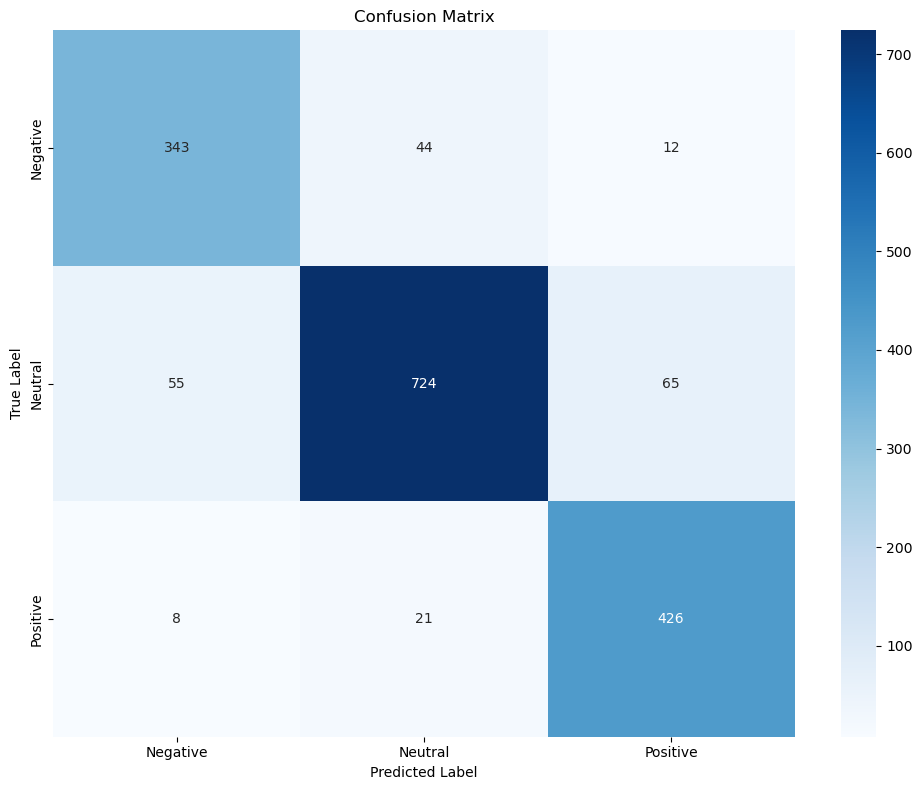


Classification Report:


,Precision,Recall,F1 Score,Accuracy
0,0.869788,0.884578,0.876079,0.87927



Per-Class Performance:


,precision,recall,f1-score,support
Negative,0.844828,0.859649,0.852174,399.0
Neutral,0.917617,0.857820,0.886712,844.0
Positive,0.846918,0.936264,0.889353,455.0


In [26]:
# Cell: Evaluate Loaded Model on Test Set + Save Misclassified
device = torch.device("cpu")  # Force CPU to avoid MPS issues
model.to(device)

try:
    from IPython.display import display, HTML
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd
    from pathlib import Path
    from src.training.model_evaluator import ModelEvaluator
    from src.config_three_class import CONFIG_3CLASS as CONFIG
    from src.data_pipeline.data_loader import DataModule

    display(HTML("<div class='section-header'>Model Evaluation (Loaded Model)</div>"))

    # Initialize tokenizer-backed data module
    data_module = DataModule(tokenizer)

    print("Loading test dataset...")
    texts, labels = data_module.load_dataset()
    _, _, test_loader = data_module.create_dataloaders(texts, labels)
    print(f"✅ Test dataset loaded with {len(test_loader.dataset)} samples.")

    # Run evaluation
    print("Running comprehensive evaluation...")
    evaluator = ModelEvaluator(
        model=model,
        device=device,
        model_name="DeBERTa 3-Class Sentiment Classifier (Best)",
        class_names=CONFIG["dataset"]["class_names"]
    )

    all_labels, all_preds, all_probs = evaluator.evaluate(test_loader)
    metrics = evaluator.calculate_metrics(all_labels, all_preds, all_probs)

    # Create DataFrame of predictions
    output_df = pd.DataFrame({
        "message": texts[-len(all_labels):],
        "true_label": [CONFIG["dataset"]["class_names"][label] for label in all_labels],
        "predicted_label": [CONFIG["dataset"]["class_names"][pred] for pred in all_preds],
        "true_index": all_labels,
        "predicted_index": all_preds,
        "confidence": [max(prob) for prob in all_probs]
    })

    # === Save all predictions ===
    full_output_path = Path("saved_models/evaluation_results/test_predictions_best_model.csv")
    full_output_path.parent.mkdir(parents=True, exist_ok=True)
    output_df.to_csv(full_output_path, index=False)
    print(f"📄 Saved full predictions to: {full_output_path}")

    # === Save only misclassified examples ===
    misclassified_df = output_df[output_df["true_index"] != output_df["predicted_index"]]
    error_path = Path("saved_models/evaluation_results/misclassified_predictions_08954.csv")
    misclassified_df.to_csv(error_path, index=False)
    print(f"❌ Saved {len(misclassified_df)} misclassified examples to: {error_path}")

    # === Confusion matrix ===
    plt.figure(figsize=(10, 8))
    cm = metrics["confusion_matrix"]
    sns.heatmap(
        cm, annot=True, fmt="d", cmap="Blues",
        xticklabels=CONFIG["dataset"]["class_names"],
        yticklabels=CONFIG["dataset"]["class_names"]
    )
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.show()

    # === Classification report ===
    print("\nClassification Report:")
    metrics_df = pd.DataFrame({
        'Precision': [metrics['precision']],
        'Recall': [metrics['recall']],
        'F1 Score': [metrics['f1']],
        'Accuracy': [metrics['accuracy']]
    })
    display(metrics_df)

    if 'per_class' in metrics:
        print("\nPer-Class Performance:")
        per_class_df = pd.DataFrame(metrics['per_class']).T
        display(per_class_df)

except Exception as e:
    print(f"An error occurred: {e}")
    import traceback
    traceback.print_exc()
